# Исследовательский анализ данных

Импорт необходимых библиотек

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

Выгрузка данных

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [3]:
display(labels)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
...,...,...
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20


Данные представляют собой таблицу из столбца file_name - наименование файла и real_age - возраст покупателя. Размер выборки - 7591 изображений.


Построим график распределения возраста

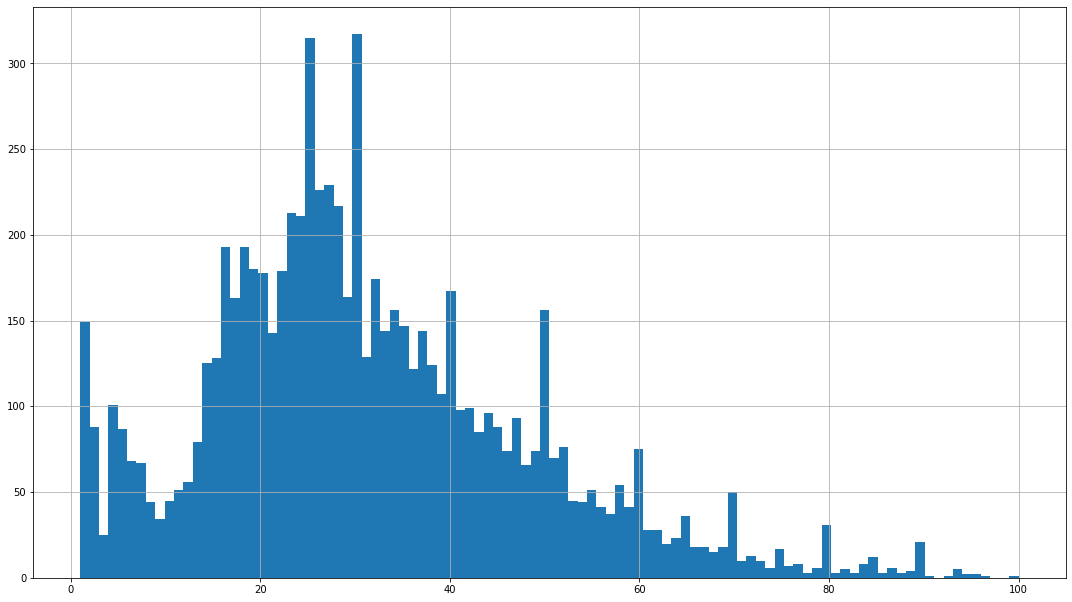

In [4]:
h = labels['real_age'].hist(bins=100)
fig = h.get_figure()
fig.set_size_inches(18.5, 10.5)

In [5]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Среднее значение возраста - 31 год. Минимальный возраст - 1 год, максимальный - 100 лет. Основная масса значений распределена между 20 и 41 годами.

НАпечатаем 10 фото

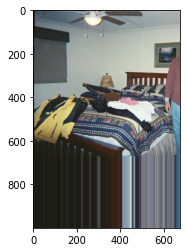

In [10]:
from PIL import Image

def image(path):
    image = Image.open(path)
    array = np.array(image)
    return plt.imshow(array)

image('/datasets/faces/final_files/000100.jpg')

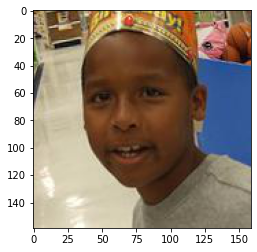

In [9]:
image('/datasets/faces/final_files/000101.jpg')

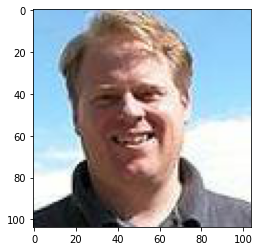

In [11]:
image('/datasets/faces/final_files/000102.jpg')

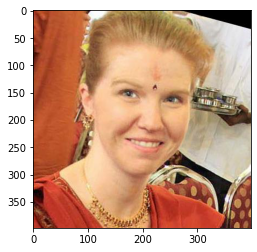

In [12]:
image('/datasets/faces/final_files/000103.jpg')

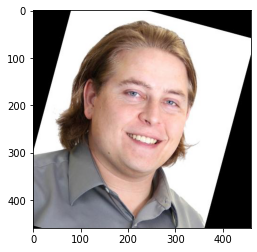

In [13]:
image('/datasets/faces/final_files/000104.jpg')

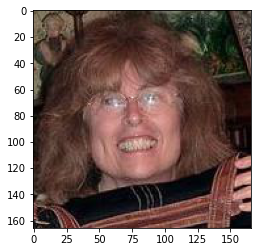

In [14]:
image('/datasets/faces/final_files/000105.jpg')

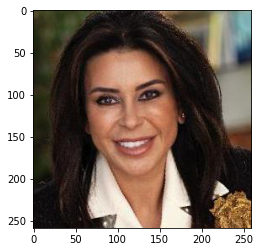

In [15]:
image('/datasets/faces/final_files/000106.jpg')

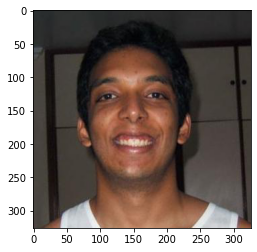

In [16]:
image('/datasets/faces/final_files/000107.jpg')

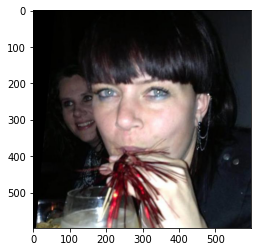

In [17]:
image('/datasets/faces/final_files/000108.jpg')

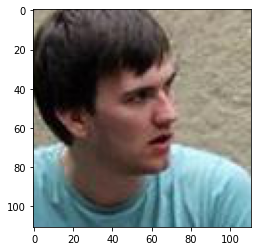

In [18]:
image('/datasets/faces/final_files/000109.jpg')

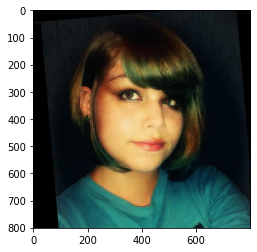

In [19]:
image('/datasets/faces/final_files/000110.jpg')

Определение возраста человека это задача регрессии, так как возраст — это количественный целевой признак.
Для определния возраста покупателей будет использована логистическая регрессия.